# Bab 7 Learning Vector Quantization

## Praktikum

### a) Fungsi *Training* LVQ

Tulis kode ke dalam *cell* di bawah ini:

In [57]:
import numpy as np

# Terdapat sedikit perubahan pada kode karena terdapat error

def lvq_fit(train, target, lrate, b, max_epoch):
    label, train_idx = np.unique(target, return_index=True)
    weight = train[train_idx].astype(np.float64)

    # Exclude initial weights from training data
    mask = np.ones(len(train), dtype=bool)
    mask[train_idx] = False
    train, target = train[mask], target[mask]

    epoch = 0
    while epoch < max_epoch:
        for i, x in enumerate(train):
            distance = [sum((w - x) ** 2) for w in weight]
            min_idx = np.argmin(distance)
            sign = 1 if target[i] == label[min_idx] else -1
            weight[min_idx] += sign * lrate * (x - weight[min_idx])
        lrate *= b
        epoch += 1
    return weight, label


### b) Fungsi *Testing* LVQ

Tulis kode ke dalam *cell* di bawah ini:

In [58]:
def lvq_predict(X, model):
	center, label = model
	Y = []
	for x in X:
		d = [sum((c - x) ** 2) for c in center]
		Y.append(label[np.argmin(d)])
	return Y

### c) Fungsi Hitung Akurasi

In [59]:
def calc_accuracy(a, b):
	s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
	return sum(s) / len(a)

### d) Percobaan LVQ

Tulis kode ke dalam *cell* di bawah ini:

Accuracy: 1.0


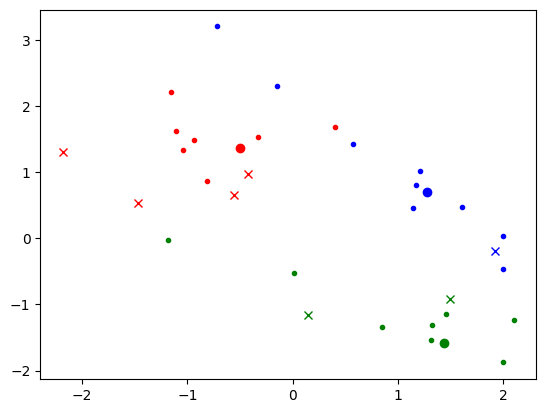

In [69]:
from random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification

X, y = make_classification(n_samples=31, n_features=2,
n_redundant=0, n_informative=2, n_classes=3,
n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = lvq_fit(X_train, y_train, lrate=.5, b=.8, max_epoch=50)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)

colors = 'rgbcmyk'
print('Accuracy:', accuracy)
for x, label in zip(X_train, y_train):
  plt.plot(x[0], x[1], colors[label] + '.')
for center, label in zip(model[0], model[1]):
  plt.plot(center[0], center[1], colors[label] + 'o')
for x, label in zip(X_test, output):
  plt.plot(x[0], x[1], colors[label] + 'x')